### Table of Contents
1. Import Data & Libraries
2. EDA (Exploratory Data Analysis)
3. Perceptron Model
4. Decision Tree Model
5. Neural Network Model
6. Naive Bayes Model
7. KNN Model


# 1. Import Data & Libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler, label_binarize

from perceptron import Perceptron
from knn import KNNClassifier
import pickle
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

raw_data = loadarff('Training Dataset.arff')
df_data = pd.DataFrame(raw_data[0])

In [3]:
df_data.replace(b'-1', '-1', inplace=True)
df_data.replace(b'1', '1', inplace=True)
df_data.replace(b'0', '0', inplace=True)

In [4]:
# convert datatype to int64
columns_to_convert = ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL',
'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']
df_data[columns_to_convert] = df_data[columns_to_convert].astype('int64')
df_data.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

# 2. EDA (Exploratory Data Analysis)

In [ ]:
df_data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df_data.shape

(11055, 31)

In [ ]:
# count the number of missing values in each column
df_data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [ ]:
print(df_data['Result'].value_counts())

 1    6157
-1    4898
Name: Result, dtype: int64


In [ ]:
df_data['Abnormal_URL'].value_counts()

 1    9426
-1    1629
Name: Abnormal_URL, dtype: int64

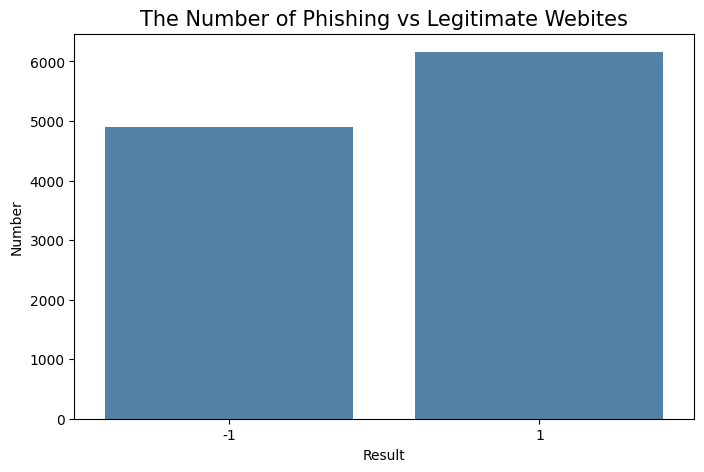

In [ ]:
#plotting a graph to see class imbalance
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Result", y="Result", data=df_data, estimator=lambda x: len(x), color = 'steelblue')
ax.set(ylabel="Number");
ax.set_title('The Number of Phishing vs Legitimate Webites', size = 15);
plt.savefig('resultpercentageplot.png', dpi=300, bbox_inches='tight');

In [ ]:
#Unique values for each columns
col = df_data.columns
for i in col:
     if  i !='index':
        print(i, df_data[i].unique())

having_IP_Address [-1  1]
URL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


### Correlation

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URL_Length                     0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IP_Address              0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372


<Axes: >

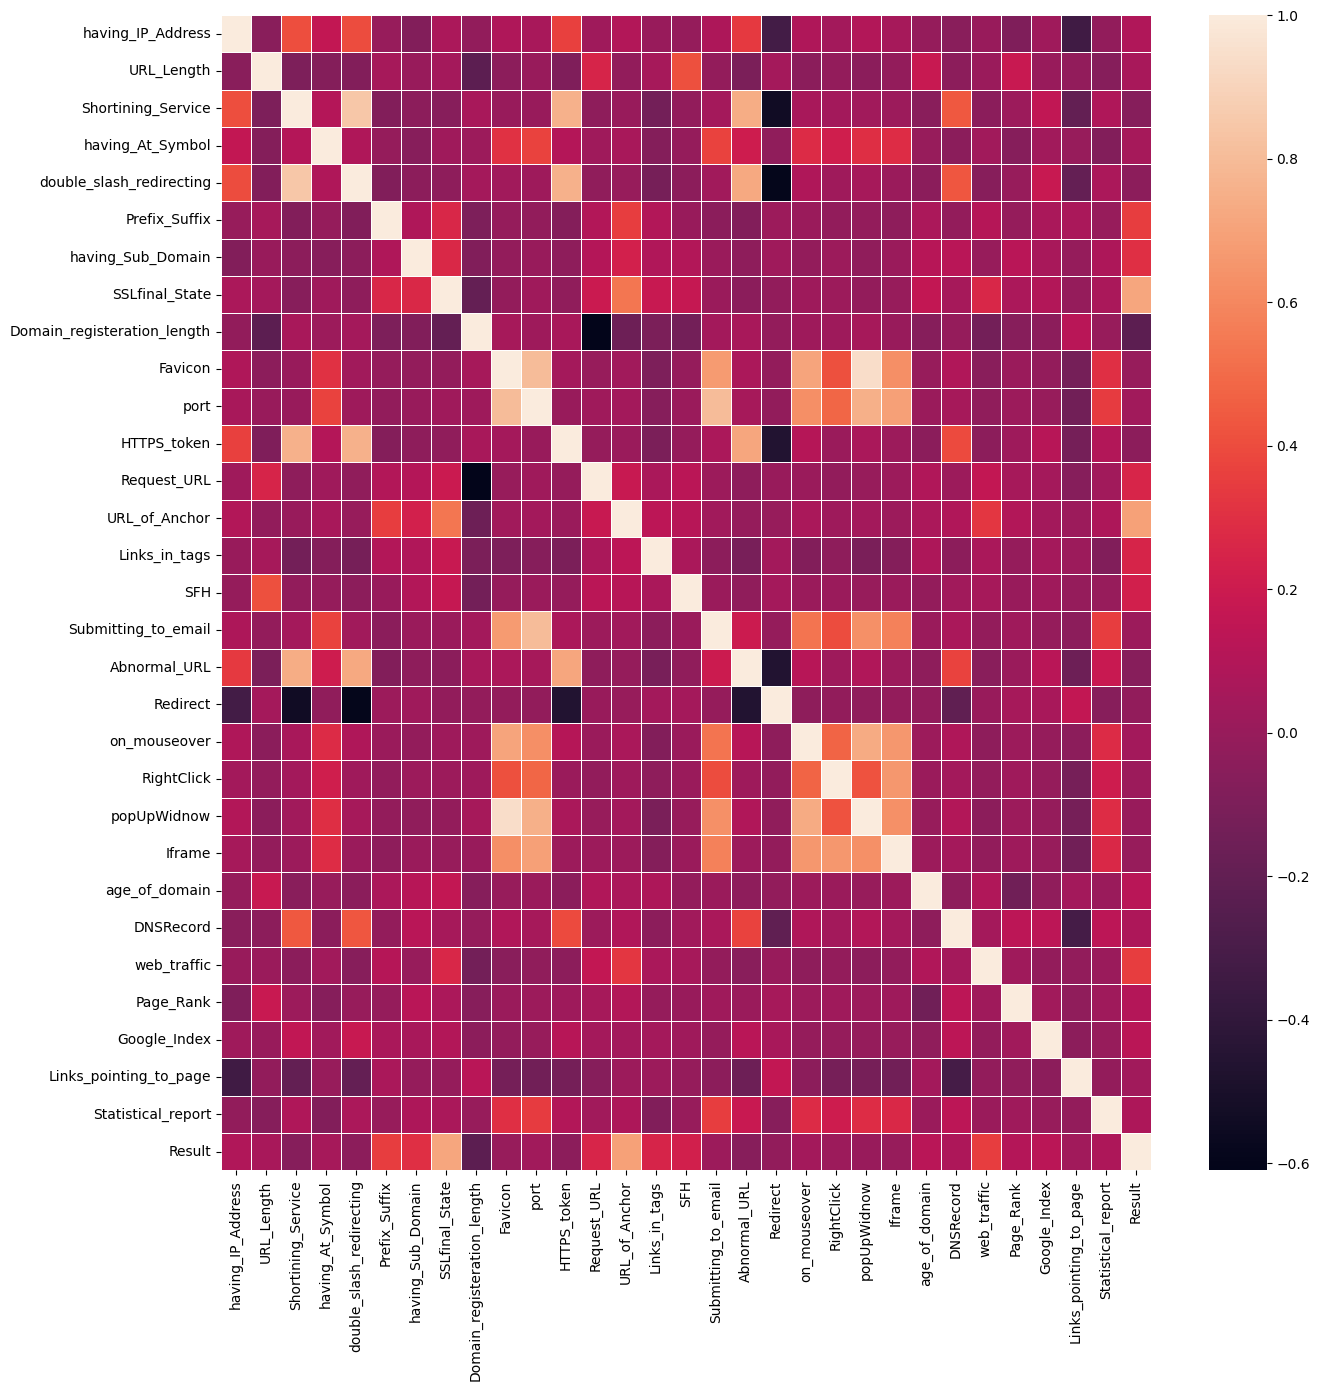

In [ ]:
# Print correlation with target variable
print(df_data.corr()['Result'].sort_values())
plt.figure(figsize=(15, 15))
sns.heatmap(df_data.corr(), linewidths=.5)

### Data Preprocessing
* Selecting The Prediction Target
* Choosing "Features"
* Tran Test Split: Training set 80%, Test set 20%

In [5]:
# Selecting The Prediction Target
y = df_data['Result'] # Target

# Choosing "Features"
X = df_data.drop(columns='Result') # Features

# convert string into integer in X,y and store them to set_X and set_y
converted_y = y.astype(str).astype(int)
converted_X = X.astype(str).astype(int)
set_X = converted_X.values
set_y = converted_y.values

# split data into training and test data, for both features and target
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    set_X, set_y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8844, 30)
(2211, 30)
(8844,)
(2211,)


# 3. Perceptron Model

In [6]:
# Initialize learning rate and number of epochs to train the Perceptron
perceptron = Perceptron(learning_rate=0.1, num_epochs=100) # Initialize the learning rate to be 0.1 and epochs to be 100
perceptron.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = perceptron.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy for Perceptron: {accuracy * 100:.3f}%")
print("with learning rate:0.1", "and epochs:100")

Accuracy for Perceptron: 89.281%
with learning rate:0.1 and epochs:100


### Finetune the hyperparameters of the Perceptron

We will split the data to : 60% for training, 20% for validation, and 20% for testing.

In [ ]:
# Split the data into training (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(set_X, set_y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a grid of hyperparameters to search through
learning_rates = [0.1, 0.01, 0.001]
num_epochs_list = [50, 100, 200]

# Initialize best accuracy and best hyperparameters (learning rate and epochs)
best_accuracy = 0
best_hyperparameters = {}

# For each combination (learning rate and epochs), create a new perceptron model with the specified learning rate and epochs
for lr in learning_rates:
    for ep in num_epochs_list:
        perceptron = Perceptron(lr, ep)
        perceptron.fit(X_train, y_train)

        # Validate the model
        model_predictions = perceptron.predict(X_val)
        accuracy = np.mean(model_predictions == y_val)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = {'learning_rate': lr, 'num_epochs': ep}

# Train the model with the best hyperparameters on the full training set
best_perceptron = Perceptron(best_hyperparameters['learning_rate'], best_hyperparameters['num_epochs'])
best_perceptron.fit(X_train, y_train)

# Evaluate the best model on the test set
test_predictions = best_perceptron.predict(X_test)
test_accuracy = np.mean(test_predictions == y_test)

print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Test Accuracy: {test_accuracy * 100:.3f}%")

Best Hyperparameters: {'learning_rate': 0.01, 'num_epochs': 200}
Test Accuracy: 92.040%


### Finetune the hyperparameters for perceptron with 10-fold cross-validation
Confusion Matrix, Accuracy, F-score, ROC curve are reported below.

In [ ]:
# Define a grid of hyperparameters to search through
learning_rates = [0.1, 0.01, 0.001, 0.0001]
num_epochs_list = [50, 100, 200, 500]

best_accuracy = 0
best_hyperparameters = {}

# Create a 10-fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for lr in learning_rates:
    for ep in num_epochs_list:
        accuracy_scores = []

        for train_idx, val_idx in kf.split(set_X):
            X_train, X_val = set_X[train_idx], set_X[val_idx]
            y_train, y_val = set_y[train_idx], set_y[val_idx]

            perceptron = Perceptron(lr, ep)
            perceptron.fit(X_train, y_train)

            # Validate the model
            predictions = perceptron.predict(X_val)
            accuracy = np.mean(predictions == y_val)
            accuracy_scores.append(accuracy)

        # Calculate the mean accuracy over the 10 folds
        mean_accuracy = np.mean(accuracy_scores)

        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_hyperparameters = {'learning_rate': lr, 'num_epochs': ep}

print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"10-Fold Cross-Validation Accuracy: {best_accuracy * 100:.3f}%")

Best Hyperparameters: {'learning_rate': 0.01, 'num_epochs': 200}
10-Fold Cross-Validation Accuracy: 87.725%


Best Confusion Matrix:
 [[394  81]
 [ 34 597]]


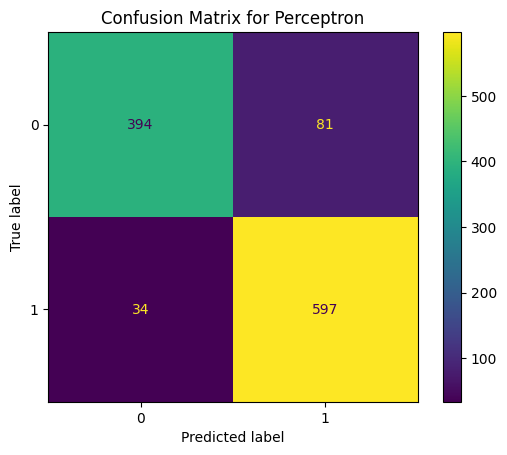

Best Accuracy:89.602%
Best F1-Score:89.518%
Best ROC AUC:88.780%


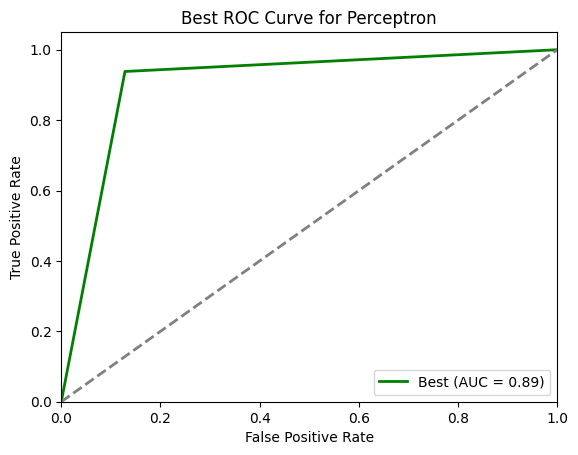

In [ ]:
# Create 10-fold for cross-validation
kf = KFold(n_splits=10, shuffle = True, random_state=42)

# Initialize lists to store evaluation metrics across the 10 folds
confusion_matrices = []
accuracies = []
f1_scores = []
roc_auc_scores = []

# Convert data to arrays
X_array = X.values
y_array = y.values

# Initialize variables to store ROC curve data
all_fpr = []
all_tpr = []
mean_auc = 0.0
best_accuracy = 0.0
best_f1_score = 0.0
best_roc_auc = 0.0
best_confusion_matrix = None
best_fpr = []
best_tpr = []

# Perform cross-validation
for train_index, val_index in kf.split(X_array):
    X_train_fold, X_val_fold = X_array[train_index], X_array[val_index]
    y_train_fold, y_val_fold = y_array[train_index], y_array[val_index]

    # Train the Perceptron model for each fold
    perceptron3 = Perceptron(learning_rate=best_hyperparameters['learning_rate'], num_epochs=best_hyperparameters['num_epochs'])
    perceptron3.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    predicted_labels = [perceptron3.predict(x) for x in X_val_fold]

    # Calculate accuracy, f1-score, roc_auc_score and store confusion matrix for the particular fold
    accuracy = accuracy_score(y_val_fold, predicted_labels)
    f1 = f1_score(y_val_fold, predicted_labels, average='weighted')
    roc_auc = roc_auc_score(y_val_fold, predicted_labels)
    confusion_matrix_fold = confusion_matrix(y_val_fold, predicted_labels)

     # Update the best score If mean accuracy is better than the current best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_confusion_matrix = confusion_matrix_fold
        best_f1_score = f1
        best_roc_auc = roc_auc
        y_val_bin = label_binarize(y_val_fold, classes=[-1, 1])
        scores = [perceptron.predict(x) for x in X_val_fold]
        best_fpr, best_tpr, _ = roc_curve(y_val_bin, scores)

    accuracies.append(accuracy)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    confusion_matrices.append(confusion_matrix_fold)

    # Compute ROC curve for this fold
    y_val_bin = label_binarize(y_val_fold, classes=[-1, 1])
    scores = [perceptron.predict(x) for x in X_val_fold]
    fpr, tpr, _ = roc_curve(y_val_bin, scores)
    mean_auc += auc(fpr, tpr)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

# Print or report the best results
print("Best Confusion Matrix:\n", best_confusion_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=best_confusion_matrix)
cm_display.plot()
plt.title('Confusion Matrix for Perceptron')
plt.show()
print(f"Best Accuracy:{best_accuracy*100:.3f}%")
print(f"Best F1-Score:{best_f1_score*100:.3f}%")
print(f"Best ROC AUC:{best_roc_auc*100:.3f}%")

# Plot the best ROC curve
plt.plot(best_fpr, best_tpr, lw=2, color='green',label=f'Best (AUC = {best_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best ROC Curve for Perceptron')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.show()


We will then develop 4 classifiers and evaluate the mean accuracy of each of them by a kfold cross validation procedure.
* Decision Tree
* Neural Network
* Naive Bayes
* KNN

# 4. Decision Tree Model

In [7]:
# Define Decision Tree model
dtree = DecisionTreeClassifier(random_state=29)

# Fit model
model_Dtree=dtree.fit(X_train, y_train)

# get predicted value on test data
dtree_predict = model_Dtree.predict(X_test)

# Acccuracy score
dtree_acc = accuracy_score(dtree_predict, y_test)
print(f"Accuracy Score for Decision Tree: {dtree_acc*100:.3f}%")

Accuracy Score for Decision Tree: 95.703%


### Finetune the hyperparameters of the Decision Tree

In [8]:
# Create the parameter grid for grid search
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [None, 5, 10, 20],
              'min_samples_split': [2, 5, 20],
              'min_samples_leaf': [1, 2, 4],
              'criterion' :['gini', 'entropy']
             }

# Using 10-fold cross validation and GridsearchCV to fit the training data
tree_clas = DecisionTreeClassifier(random_state=29)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv = 10, verbose = 5, scoring= 'accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
dt_best = grid_search.best_estimator_
print('Best Parameter:', grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_*100:.3f}%")

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=a

Accuracy Score: 95.839%
F1-score: 96.361 %
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.96      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



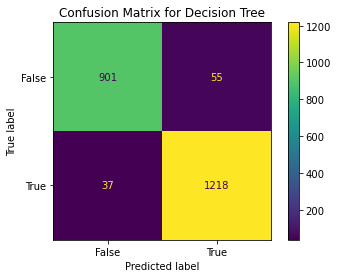

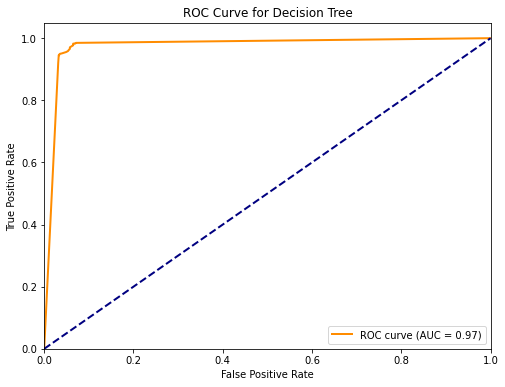

In [9]:
# Fit model with best parameters
dtree2 = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, random_state=29).fit(X_train, y_train)

# Get predicted value on test data
dtree2_predict = dtree2.predict(X_test)

# Accuracy Score
accuracy=accuracy_score(y_test, dtree2_predict)
print(f"Accuracy Score: {accuracy*100:.3f}%")

# F1-score
f1=f1_score(y_test, dtree2_predict)
print('F1-score:', round(f1*100, 3),"%")

#Classification Report
print(classification_report(y_test, dtree2_predict))

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, dtree2_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# ROC curve
# Get predicted probabilities for the positive class
dtree2_probs = dtree2.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, dtree2_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

# 5. Neural Network Model

In [10]:
# Define Neural Network model
mlp = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes = (10,5), max_iter=5000, random_state=42, verbose = 1)

# Fit model
model_MLP = mlp.fit(X_train, y_train)

# Prediction
mlp_predict = model_MLP.predict(X_test)

# Accuracy score
mlp_acc = accuracy_score(mlp_predict, y_test)
print(f"Accuracy Score for Neural Network: {mlp_acc*100:.3f}%")

Iteration 1, loss = 0.82357433
Iteration 2, loss = 0.73049798
Iteration 3, loss = 0.67657539
Iteration 4, loss = 0.63527520
Iteration 5, loss = 0.59978475
Iteration 6, loss = 0.56713108
Iteration 7, loss = 0.53621364
Iteration 8, loss = 0.50680813
Iteration 9, loss = 0.47878549
Iteration 10, loss = 0.45254890
Iteration 11, loss = 0.42818476
Iteration 12, loss = 0.40630758
Iteration 13, loss = 0.38729153
Iteration 14, loss = 0.37077867
Iteration 15, loss = 0.35637133
Iteration 16, loss = 0.34381202
Iteration 17, loss = 0.33268294
Iteration 18, loss = 0.32252828
Iteration 19, loss = 0.31332718
Iteration 20, loss = 0.30491150
Iteration 21, loss = 0.29723074
Iteration 22, loss = 0.29006897
Iteration 23, loss = 0.28358385
Iteration 24, loss = 0.27744661
Iteration 25, loss = 0.27171603
Iteration 26, loss = 0.26642622
Iteration 27, loss = 0.26148157
Iteration 28, loss = 0.25693881
Iteration 29, loss = 0.25268759
Iteration 30, loss = 0.24862156
Iteration 31, loss = 0.24491832
Iteration 32, los

### Finetune the hyperparameters of the Neural Network

In [ ]:
# Create the parameter grid for grid search
parameter_space = {
    'hidden_layer_sizes': [(10,),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Using 10-fold cross validation and GridsearchCV to fit the training data
mlp_gs = MLPClassifier(max_iter=150, random_state=42)
grid_search = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=10)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print('Best parameters found:\n', grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_*100:.3f}%")

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Accuracy: 95.417%


Accuracy Score: 96.427%
F1-score: 96.891 %
              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



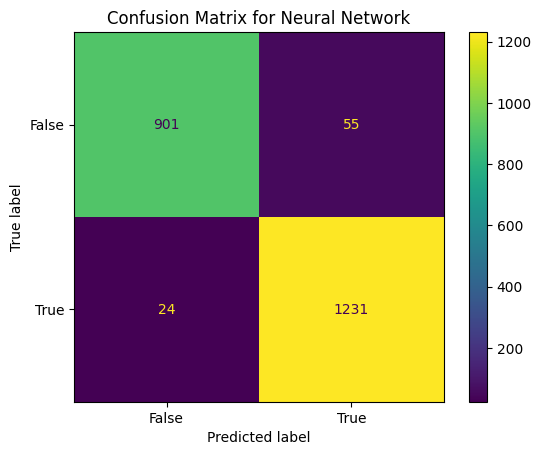

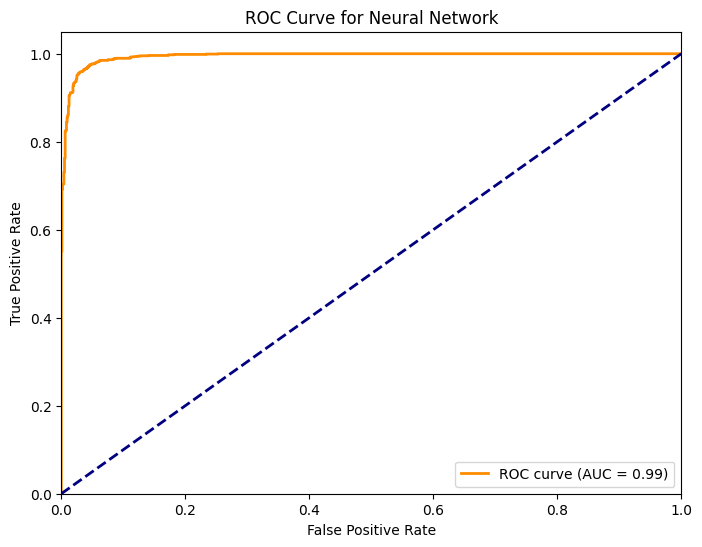

In [ ]:
# Fit model with best parameters
mlp2 = mlp_gs.fit(X_train, y_train)

# Get predicted value on test data
mlp2_predict = mlp2.predict(X_test)

# Accuracy Score
accuracy=accuracy_score(y_test, mlp2_predict)
print(f"Accuracy Score: {accuracy*100:.3f}%")

# F1-score
f1=f1_score(y_test, mlp2_predict)
print('F1-score:', round(f1*100, 3),"%")

#Classification Report
print(classification_report(y_test, mlp2_predict))

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, mlp2_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix for Neural Network')
plt.show()

# ROC Curve
# Get predicted probabilities for the positive class
mlp2_probs = mlp2.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, mlp2_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()

# 6. Naive Bayes Model

In [21]:
# Define model
nb = BernoulliNB()

# Fit model
model_NB = nb.fit(X_train, y_train)

# get predict value on test data
nb_predict = model_NB.predict(X_test)

# Mean Absolute Error
nb_MAE = mean_absolute_error(y_test, nb_predict)
print(f"Mean Absolute Error for Naive Bayes: {nb_MAE*100:.3f}%")

# Acccuracy score
nb_acc = accuracy_score(nb_predict, y_test)
print(f"Accuracy Score for Naive Bayes:{nb_acc*100:.3f}%")

Mean Absolute Error for Naive Bayes: 19.539%
Accuracy Score for Naive Bayes:90.231%


### Finetune the hyperparameters of the Naive Bayes

In [17]:
# Create the parameter grid for grid search
param_grid = {'alpha': [1.0, 2.0],
              'fit_prior' : [True, False],
             }

# Using 10-fold cross validation and GridsearchCV to fit the training data
nb2 = BernoulliNB()
grid_search = GridSearchCV(estimator=nb2, param_grid=param_grid, cv = 10, verbose = 5, scoring= 'accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
nb_best = grid_search.best_estimator_
print('Best Parameter:', grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_*100:.3f}%")

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END .....................alpha=1.0, fit_prior=True; total time=   0.0s
[CV 2/10] END .....................alpha=1.0, fit_prior=True; total time=   0.0s
[CV 3/10] END .....................alpha=1.0, fit_prior=True; total time=   0.0s
[CV 4/10] END .....................alpha=1.0, fit_prior=True; total time=   0.0s


[CV 5/10] END .....................alpha=1.0, fit_prior=True; total time=   0.0s
[CV 6/10] END .....................alpha=1.0, fit_prior=True; total time=   0.0s
[CV 7/10] END .....................alpha=1.0, fit_prior=True; total time=   0.0s
[CV 8/10] END .....................alpha=1.0, fit_prior=True; total time=   0.0s
[CV 9/10] END .....................alpha=1.0, fit_prior=True; total time=   0.0s
[CV 10/10] END ....................alpha=1.0, fit_prior=True; total time=   0.0s
[CV 1/10] END ....................alpha=1.0, fit_prior=False; total time=   0.0s
[CV 2/10] END ....................alpha=1.0, fit_prior=False; total time=   0.0s
[CV 3/10] END ....................alpha=1.0, fit_prior=False; total time=   0.0s
[CV 4/10] END ....................alpha=1.0, fit_prior=False; total time=   0.0s
[CV 5/10] END ....................alpha=1.0, fit_prior=False; total time=   0.0s
[CV 6/10] END ....................alpha=1.0, fit_prior=False; total time=   0.0s
[CV 7/10] END ..............

Accuracy Score for Naive Bayes:90.231%
F1-score: 91.415 %
              precision    recall  f1-score   support

          -1       0.89      0.88      0.89       956
           1       0.91      0.92      0.91      1255

    accuracy                           0.90      2211
   macro avg       0.90      0.90      0.90      2211
weighted avg       0.90      0.90      0.90      2211



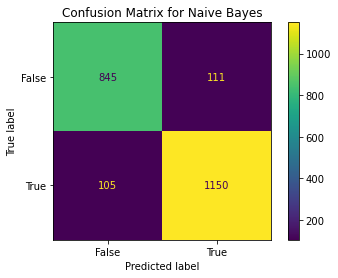

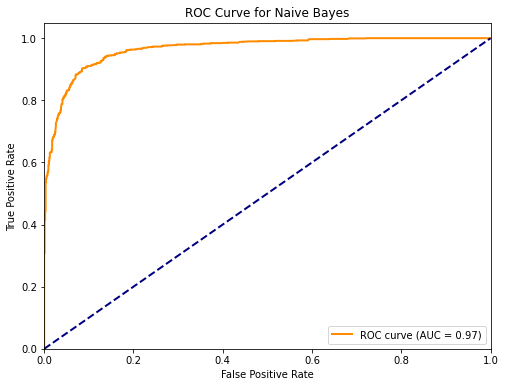

In [20]:
# Fit model with best parameters
nb2 = BernoulliNB(alpha=1.0, fit_prior=True)
nb_model = nb2.fit(X_train, y_train)

# Get predicted value on test data
nb2_predict = nb_model.predict(X_test)

# Acccuracy score
nb_acc = accuracy_score(nb2_predict, y_test)
print(f"Accuracy Score for Naive Bayes:{nb_acc*100:.3f}%")

# F1-score
f1=f1_score(y_test, nb2_predict)
print('F1-score:', round(f1*100, 3),"%")

#Classification Report
print(classification_report(y_test, nb2_predict))

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, nb2_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# ROC curve
# Get predicted probabilities for the positive class
nb_probs = nb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, nb_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

No hyperparameters, no cross validation

# 7. KNN Model

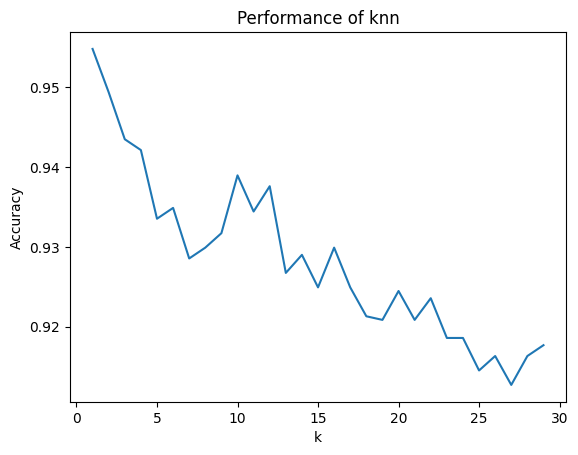

Accuracy score for KNN:91.768%


In [8]:
# Test knn model across varying ks
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNNClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()
print(f"Accuracy score for KNN:{accuracy*100:.3f}%")

### Finetune the hyperparameters of the KNN

In [ ]:
# Define the range of k values to test
k_values = range(1, 21)  # Test k values from 1 to 20

# Create a 10-fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

best_k = None
best_accuracy = 0

for k in k_values:
    accuracies = []  # Store accuracy for each fold

    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        knn = KNNClassifier(k=k)
        knn.fit(X_train_fold, y_train_fold)
        accuracy = knn.evaluate(X_val_fold, y_val_fold)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

# Reinitialize KNNClassifier with the best k value
best_knn = KNNClassifier(k=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the best model on the test set
test_accuracy = best_knn.evaluate(X_test, y_test)

print(f"Best k: {best_k}")
print(f"Test Accuracy: {test_accuracy * 100:.3f}%")

Best k: 2
Test Accuracy: 94.934%


Accuracy Score:94.934%
F1 Score:95.591%
              precision    recall  f1-score   support

          -1       0.96      0.93      0.94       956
           1       0.94      0.97      0.96      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



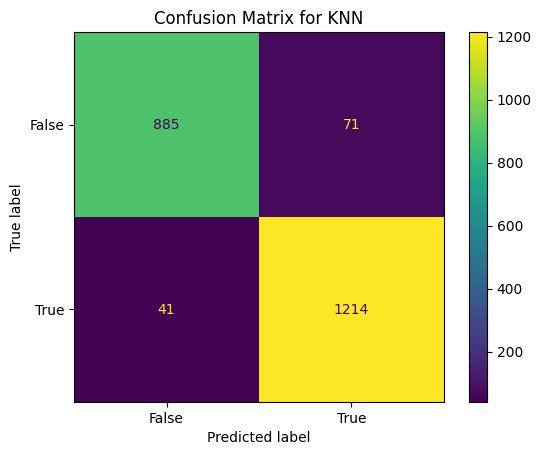

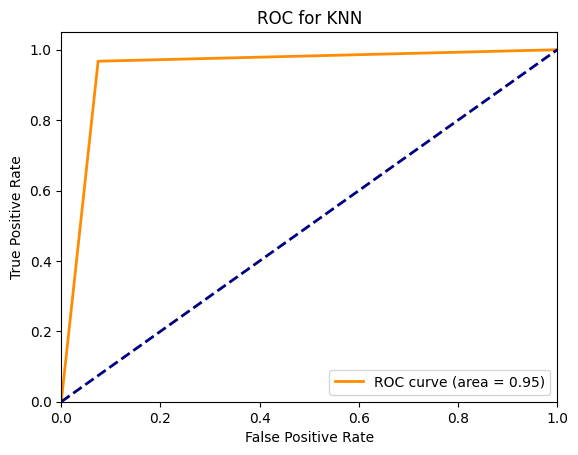

In [ ]:
# Make predictions on the test data
knn_predict = best_knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(knn_predict, y_test)
print(f"Accuracy Score:{accuracy*100:.3f}%")

# F1-score
f1 = f1_score(y_test, knn_predict)
print(f"F1 Score:{f1*100:.3f}%")

# Classification Report
print(classification_report(y_test, knn_predict))

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, knn_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix for KNN')
plt.show()

# Calculate ROC curve and ROC AUC score
probs = best_knn.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for KNN')
plt.legend(loc="lower right")
plt.show()